# Linear Regression

Lets assume that we have $N$ observation and $M$ features. The problem of linear regression is defined as:

$$\vec{y}_p = \boldsymbol{X} \vec{w},$$
* $\vec{y}_p$, a vector of size $N$, represents our predictions. 
* $\boldsymbol{X}$ is a matrix of $(N\times M)$. 
* $\vec{w}$ is the fitting parameters, its our job to find them.

Let measure how good are predictions are, we use Mean Squared Error (MSE) to calculate the distance of our predictions from true values:

$$J = (\vec{y}_p - \vec{y}_t)^2$$

* $\vec{y}_t$ is a vector of true values. 
* $J$ is MSE and it is an scalar.

Now our job is to find $\vec{w}$ in such a way that it minimizes the cost function. Here we are going to use Stochastic Gradient Descent (SGD) to do that. 



In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mse(y_t, y_p):
    '''returns the mean squared error.
    Parameters
    ----------
    y_t : numpy array, shape (n_samples,) 
        True labels.
    y_p : numpy array (float), shape (n_samples,)
        Output of classifier (not lables).
    
    Returns
    -------
    float
        Returns MSE.
    
    Example
    -------
    >>> import numpy as np
    >>> t = np.array([-1,1,1])
    >>> y = np.array([1,-1,0])
    >>> mse(t, y)
    3.0
    '''
    d = y_t-y_p
    return np.dot(d,d)/d.size

In [3]:
def d_mse(X, y_t, y_p):
    '''
    Gradient of mean squared error. 

    Parameters
    ----------
    X : numpy array, shape (n_smaples, n_features)
        Matrix of features.    
    y_t : numpy array, shape (n_samples,)
        True labels.
    y_p : numpy array (float), shape (n_samples,)
        Output of classifier (not lables).
    
    Returns
    -------
    numpy array, shape (n_features,)
        Returns the gradient of MSE.
    
    Example
    -------
    >>> import numpy as np
    >>> X = np.array([[-1,-1],[1,1],[0,1]])
    >>> y_t = np.array([-1,1,1])
    >>> y_p = np.array([1,0,1])
    >>> d_mse(X, y_t, y_p)
    array([-2., -2.])
    '''
    
    d = y_p-y_t
    return 2*X.T.dot(d)/d.size
    

In [119]:
def l2(w):
    '''
    Return l2 penalty. 
    w : weights of the model, a numpy vector of (n_features)
    '''
    return np.dot(w,w)

def d_l2(w):
    '''
    Return gradient of l2 penalty.
    w : weights of the model, a numpy vector of (n_features)
    '''
    return 2*w


In [177]:
def l1(w):
    '''
    Return l2 penalty. 
    w : weights of the model, a numpy vector of (n_features)
    '''
    return np.abs(w).sum()

def d_l1(w):
    '''
    Return gradient of l2 penalty.
    w : weights of the model, a numpy vector of (n_features)
    '''
    return 2*(w>0).astype(float)-1


In [178]:
def GD(X, y_t, eta=0.0001, alpha=0.1, epoches=10000, tol=10**-15):
    '''
    Gradient Descent learning. 
    
    The default loss function is MSE and the default penalty is l2. 
    
    If the test set is provided, it keeps running until the cost stop decreasing. 
    If the test set is not provided, it keeps running until the improvment in the cost is less than **tol**.
    
    Parameters
    ----------
    eta: float 
        Learning rate, default to 0.0001.
        
    alpha: float
        Regularization parameter, defaults to 1.0
            
    epoches: int
        number of epoches to train, defaults to 1000.
            
    tol: float 
        Stop training if the improvment in cost function is less than tol (when test set is not provided). 
        Defaults to 0.00001.

    Returns
    -------
    numpy array, shape (n_features,)
        Returns the weights (fitting parameters).
        
    Example
    -------
    >>> import numpy as np
    >>> X = np.array([[1, 1], [1, 3]])
    >>> y_t = np.array([3, 7])
    >>> GD(X, y_t, eta=0.01, alpha=0.0, epoches=10000)
    array([ 1.,  2.])
    '''
    w = np.random.normal(size=X.shape[1])
    for n in range(epoches):
        y_p = np.dot(X,w)
        d = eta * d_mse(X,y_t,y_p) + alpha * d_l1(w) 
        w -= d
        if np.abs(d).max()< tol:
            break
    return w

In [179]:
import doctest
doctest.testmod()

TestResults(failed=0, attempted=13)

In [97]:
def SGD(X, y_t, eta=0.00001, alpha=1.0, b = 100, epoches=1000, tol=0.00001):
    '''
    mini-batch Stochastic Gradient Descent learning. 
    
    The default loss function is MSE and the default penalty is l2. 
    
    If the test set is provided, it keeps running until the cost stop decreasing. 
    If the test set is not provided, it keeps running until the improvment in the cost is less than **tol**.
    
    Parameters
    ----------
    eta: float 
        Learning rate, default to 0.0001.
        
    alpha: float
        Regularization parameter, defaults to 1.0
        
    b: int 
        batch size, defaults to 100.
    
    epoches: int
        number of epoches to train, defaults to 1000.
    
    normalize: bool
        True: normalize data by mean and std (default).
        False: do not change the data.
        
    tol: float 
        Stop training if the improvment in cost function is less than tol (when test set is not provided). 
        Defaults to 0.00001.

    Returns
    -------
    numpy array, shape (n_features,)
        Returns the weights (fitting parameters).
        
    Example
    -------
    >>> import numpy as np
    ... (write your test heere.)
    '''
    

Now consider a simple linear model $y =  x + 1$. Given x, this gives us the true value of $y$, ($y_t$). 
Generate some $x$ and $y$ pairs, use your code to infer fitting parameters. Plot the ground truth $y = x +1$ and your fitted model for the interval of $x \in [-2,2]$.

[[ 1.         -0.90026535]
 [ 1.         -0.46187449]
 [ 1.         -0.23634976]
 [ 1.          0.28248007]]
[ 0.61742004  1.17193473  0.11682354  1.49462491]
[ 0.90181993  0.16779013]
MSE on training set: 0.540454012939
MSE on testing set: 0.979295822154


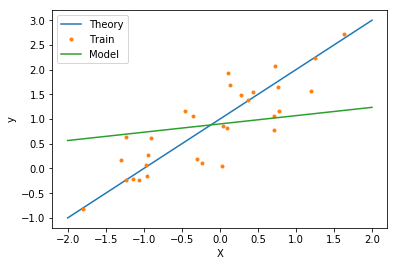

In [88]:
N_train = 30
X_train = np.ones((N_train,2))
X_train[:,1] = np.random.uniform(size=X_train.shape[0])*4-2
y_train = 1 + X_train[:,1] + 0.5*np.random.normal(size=X_train.shape[0])

print(X_train[:4,:])
print(y_train[:4])

N_test = 30
X_test = np.ones((N_test,2))
X_test[:,1] = np.random.uniform(size=X_test.shape[0])*4-2
y_test = 1 + X_test[:,1] + 0.5*np.random.normal(size=X_test.shape[0])


X = np.ones((100,2))
X[:,1] = np.linspace(-2,2,100)
y_theory = 1+X[:,1]
plt.plot(X[:,1], y_theory)

plt.plot(X_train[:,1], y_train, '.')

w = GD(X_train, y_train)
print(w)

y_model = np.dot(X,w)
plt.plot(X[:,1], y_model)

plt.legend(['Theory', 'Train', 'Model'])
plt.xlabel('X')
plt.ylabel('y')

print('MSE on training set:',mse(y_train, np.dot(X_train,w)))
print('MSE on testing set:',mse(y_test, np.dot(X_test,w)))

[[ 1.          0.72907818  0.53155499]
 [ 1.          1.69368009  2.86855225]
 [ 1.         -1.92822367  3.71804652]
 [ 1.         -0.86358521  0.74577941]]
[ 0.63794672  2.01028952  6.72834572  3.27072323]
[ 0.56157111 -0.84348304  1.32432299]
MSE on training set: 0.337398088469
MSE on testing set: 3.62963162681


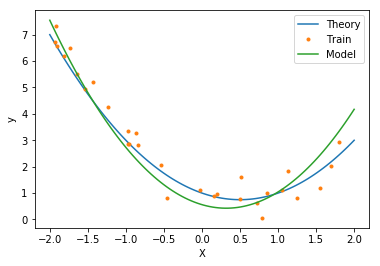

In [89]:
N_train = 30
X_train = np.ones((N_train,3))
X_train[:,1] = np.random.uniform(size=X_train.shape[0])*4-2
X_train[:,2] = X_train[:,1]**2
y_train = 1 - X_train[:,1] + X_train[:,2] + 0.5*np.random.normal(size=X_train.shape[0])

print(X_train[:4,:])
print(y_train[:4])


N_test = 30
X_test = np.ones((N_test,3))
X_test[:,1] = np.random.uniform(size=X_test.shape[0])*4-2
X_test[:,2] = X_test[:,1]**2

y_test = 1 + X_test[:,1] -X_test[:,1]+ 0.5*np.random.normal(size=X_test.shape[0])


X = np.ones((100,3))
X[:,1] = np.linspace(-2,2,100)
X[:,2] = X[:,1]**2
y_theory = 1-X[:,1]+ X[:,2]
plt.plot(X[:,1], y_theory)

plt.plot(X_train[:,1], y_train, '.')

w = GD(X_train, y_train)
print(w)

y_model = np.dot(X,w)
plt.plot(X[:,1], y_model)

plt.legend(['Theory', 'Train', 'Model'])
plt.xlabel('X')
plt.ylabel('y')

print('MSE on training set:',mse(y_train, np.dot(X_train,w)))
print('MSE on testing set:',mse(y_test, np.dot(X_test,w)))


[[  1.00000000e+00  -4.94673447e-01   2.44701819e-01  -1.21047492e-01
    5.98789802e-02  -2.96205416e-02]
 [  1.00000000e+00  -1.87074170e-01   3.49967452e-02  -6.54698708e-03
    1.22477218e-03  -2.29123239e-04]
 [  1.00000000e+00  -4.25419801e-01   1.80982007e-01  -7.69933294e-02
    3.27544868e-02  -1.39344073e-02]
 [  1.00000000e+00  -7.77258359e-01   6.04130557e-01  -4.69565525e-01
    3.64973730e-01  -2.83678882e-01]]
[ 0.5572545   0.99047337  0.63807984  0.35363299]
nonlinear [ 0.99708122  0.63727215  0.06163064  0.00769891 -0.35475106  0.7745514 ]
l2 [  8.60997057e-01   4.07296306e-01  -6.70403007e-06   3.31728005e-01
   9.53134839e-06   1.03144124e-05]
linear [-0.0329351  -0.06844026]
MSE on training set (non linear without l2): 0.0158276544555
MSE on testing set (non linear without l2): 89.6633174829
MSE on training set (non linear with l2): 0.0423936050522
MSE on testing set (non linear with l2): 0.549561486841
MSE on training set (linear): 0.867665031763
MSE on testing set

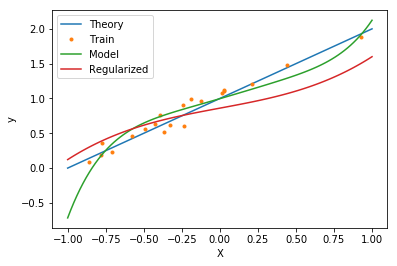

In [182]:
N_train = 20
n_features = 6
X_train = np.ones((N_train, n_features))
X_train[:,1] = np.random.uniform(size=X_train.shape[0])*2-1
y_train = 1 + X_train[:,1] + 0.1*np.random.normal(size=X_train.shape[0])

for i in range(2, n_features):
    X_train[:,i] = X_train[:,i-1]*X_train[:,1]


print(X_train[:4,:])
print(y_train[:4])

N_test = 30
X_test = np.ones((N_test,n_features))
X_test[:,1] = np.random.uniform(size=X_test.shape[0])*4-2
y_test = 1 + X_test[:,1] + 0.5*np.random.normal(size=X_test.shape[0])

for i in range(2, n_features):
    X_test[:,i] = X_test[:,i-1]*X_test[:,1]


X = np.ones((100,n_features))
X[:,1] = np.linspace(-1,1,100)
y_theory = 1+X[:,1]

for i in range(2, n_features):
    X[:,i] = X[:,i-1]*X[:,1]

plt.plot(X[:,1], y_theory)

plt.plot(X_train[:,1], y_train, '.')

w = GD(X_train, y_train, eta=0.0001, alpha =0, epoches=100000)
w_l2 = GD(X_train, y_train, eta=0.0001, alpha=0.00001, epoches=100000)
w_linear = GD(X_train[:,:2], y_train, eta=0.001, alpha =0, epoches=1000000)

w_linear = GD(X_train[:,:2], y_train, eta=0.001, epoches=100000)
print("nonlinear",w)
print("l2",w_l2)
print("linear",w_linear)

y_model = np.dot(X,w)
plt.plot(X[:,1], y_model)

y_l2 = np.dot(X,w_l2)
plt.plot(X[:,1], y_l2)

plt.legend(['Theory', 'Train', 'Model', 'Regularized'])
plt.xlabel('X')
plt.ylabel('y')

print('MSE on training set (non linear without l2):',mse(y_train, np.dot(X_train,w)))
print('MSE on testing set (non linear without l2):',mse(y_test, np.dot(X_test,w)))

print('MSE on training set (non linear with l2):',mse(y_train, np.dot(X_train,w_l2)))
print('MSE on testing set (non linear with l2):',mse(y_test, np.dot(X_test,w_l2)))


print('MSE on training set (linear):',mse(y_train, np.dot(X_train[:,:2],w_linear)))
print('MSE on testing set (linear):',mse(y_test, np.dot(X_test[:,:2],w_linear)))

array([ 0.00088327,  0.00114882])

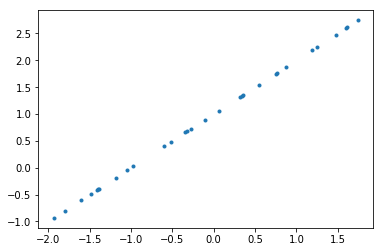

In [154]:
X = np.ones((30,2))
X[:,1] = np.random.uniform(size=X.shape[0])*4-2
y_t = X[:,0] + X[:,1]
plt.plot(X[:,1],y_t,'.')

GD(X,y_t)

Now generate some other $x$ and $y$ pairs, add a normally distributed noise ($\mu =0 $ $\sigma = 0.1$) to $y$ and infer fitting parameters again. Plot the theory and fitted line. 

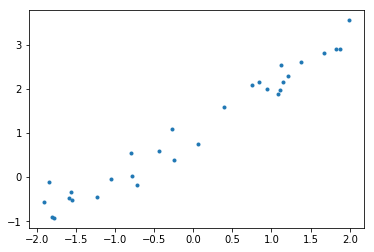

In [158]:
y_t += np.random.normal(0, 0.25, size=y_t.size)
plt.plot(X[:,1],y_t, '.')

In [159]:
GD(X,y_t)

array([ 1.08133113,  1.02145338])

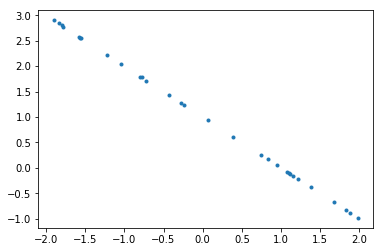

In [164]:
y_t = X[:,0] - X[:,1] #+ X[:,1]**2
plt.plot(X[:,1],y_t, '.')


In [169]:
X_poly = np.ones((X.shape[0],6))
X_poly[:,1] = X[:,1]
X_poly[:,2] = X[:,1]**2
X_poly[:,3] = X[:,1]**3
X_poly[:,4] = X[:,1]**4
X_poly[:,5] = X[:,1]**5
w = GD(X_poly,y_t)
w

y_p = np.dot(X_poly,w)

In [170]:
X_test = np.ones((100,2))
X_test[:,1] = np.linspace(-2,2,X_test.shape[0])

X_test_poly = np.ones((X_test.shape[0],6))
X_test_poly[:,1] = X_test[:,1]
X_test_poly[:,2] = X_test[:,1]**2
X_test_poly[:,3] = X_test[:,1]**3
X_test_poly[:,4] = X_test[:,1]**4
X_test_poly[:,5] = X_test[:,1]**5


y_test = np.dot(X_test_poly,w)

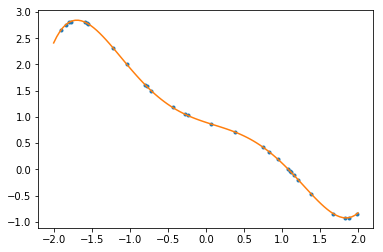

In [171]:
plt.plot(X[:,1], y_p,'.')
plt.plot(X_test_poly[:,1],y_test)

In [147]:
w

array([ 0.49340728, -0.67692261,  1.80731929, -0.20931306, -0.23766177,
        0.01552974])

In [60]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Places a legend on the axes.
    
    To make a legend for lines which already exist on the axes
    (via plot for instance), simply call this function with an iterable
    of strings, one for each legend item. For example::
    
        ax.plot([1, 2, 3])
        ax.legend(['A simple line'])
    
    However, in order to keep the "label" and the legend element
    instance together, it is preferable to specify the label either at
    artist creation, or by calling the
    :meth:`~matplotlib.artist.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        # Overwrite the label by calling the method.
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label starting with an underscore.
    This is default for all artists, so calling :meth:`leg

In [176]:
2*(w>0).astype(float)-1

array([ 1.,  1., -1.,  1.,  1., -1.])

In [172]:
w * 1

array([ 1.35437434,  0.26317797, -1.14618088,  1.37619932,  0.79938663,
       -0.48587002])